In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin

import tensorflow as tf
from tensorflow.python.ops import array_ops

from tfshow import show_graph
from emp_risk_optimizer import LinearRegressionGD

/Users/zed/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


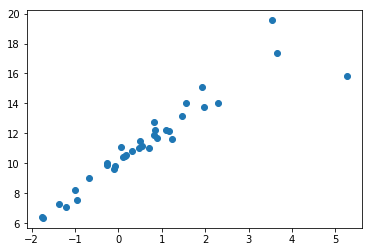

In [2]:
df = pd.read_csv('data/leverage.csv')
X = df.values[:, 0:2]
n, p = X.shape
y = df.values[:, -1].reshape(n, 1)
_ = plt.plot(X[:,1], y, 'o')

In [3]:
model = LinearRegressionGD(
    model_name='LinearRegression',
    eta=0.001)
model.fit(X,y,n_iter=10000)

TypeError: 'Variable' object is not iterable.

In [13]:
evals = model.get_eval()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('model beta:', evals['params'])
print('beta:', beta)
print('model loss:', evals['loss'])
print('loss:', np.sum((y-X.dot(beta))**2)/n)
print('model Hessian:', evals['hessian'])
print('Hessian:', 2*X.T.dot(X)/n)

model beta: [[10.177584 ]
 [ 1.8256593]]
beta: [[10.17787328]
 [ 1.82557757]]
model loss: 0.9637321
loss: 0.9637321528238548
model Hessian: [[2.        1.2687083]
 [1.2687083 5.2220116]]
Hessian: [[2.         1.26870828]
 [1.26870828 5.22201118]]


In [25]:
x1 = np.array([1, -2])
x2 = np.array([1, 4.5])
y1 = model.predict(x1)[0][0]
y2 = model.predict(x2)[0][0]

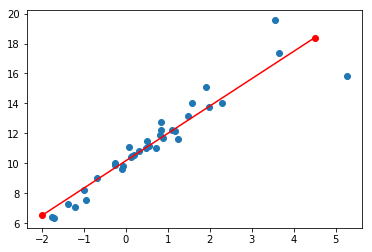

In [30]:
plt.plot(X[:,1], y, 'o')
plt.plot([-2, 4.5], [y1, y2], 'o', color='red')
_ = plt.plot([-2, 4.5], [y1, y2], color='red')